<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>
<center><b><h1>Ghada Afsana- 24010101633</b></center>

<center><b><h1>Project Task-2</b></center>    
<pre>    

# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


# Load Dataset

In [12]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Basic Info

In [13]:
print("Shape:", df.shape)


Shape: (70000, 13)


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [15]:
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Convert Age to Years

In [4]:
df["age_years"] = (df["age"] / 365).astype(int)
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


# Check Missing Values

In [5]:
df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

# Count Unique Values (Categorical-like Columns)

In [6]:
cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

for c in cat_cols:
    print(c, df[c].unique())


gender [2 1]
cholesterol [1 3 2]
gluc [1 2 3]
smoke [0 1]
alco [0 1]
active [1 0]
cardio [0 1]


# Remove Impossible (Invalid) Values

In [7]:
df_clean = df[
    (df["height"] >= 120) & (df["height"] <= 220) &
    (df["weight"] >= 30) & (df["weight"] <= 200) &
    (df["ap_hi"] >= 80) & (df["ap_hi"] <= 250) &
    (df["ap_lo"] >= 40) & (df["ap_lo"] <= 200)
]

print("Before:", df.shape)
print("After:", df_clean.shape)


Before: (70000, 14)
After: (68702, 14)



# IQR Outlier Report (Simple)

In [8]:
num_cols = ["age_years", "height", "weight", "ap_hi", "ap_lo"]

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]

    print(f"{col}: outliers = {len(outliers)}")


age_years: outliers = 4
height: outliers = 456
weight: outliers = 1735
ap_hi: outliers = 1049
ap_lo: outliers = 3578



# Simple Graphs (Beautiful & Easy)

# Target distribution

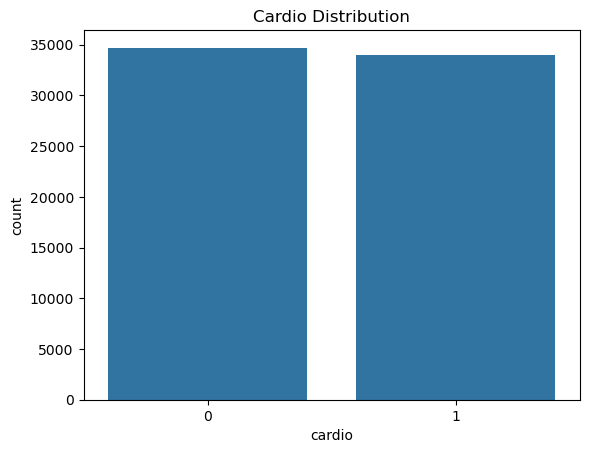

In [9]:
sns.countplot(data=df_clean, x="cardio")
plt.title("Cardio Distribution")
plt.show()


# Age distribution

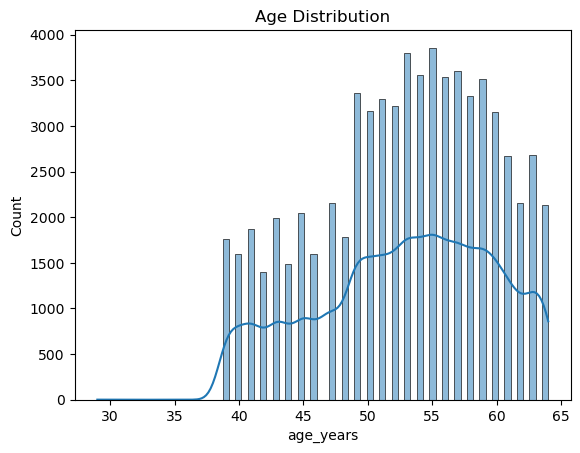

In [10]:
sns.histplot(df_clean["age_years"], kde=True)
plt.title("Age Distribution")
plt.show()



# Boxplot for numeric columns

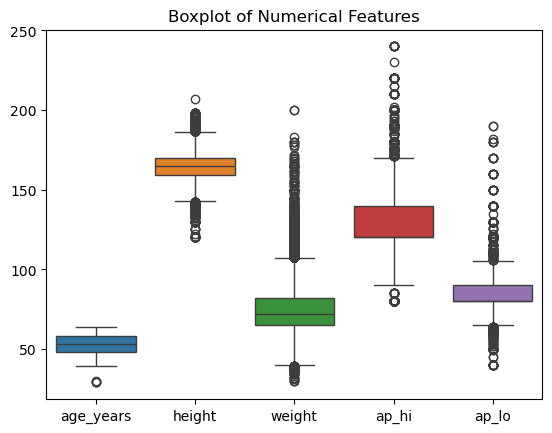

In [11]:
sns.boxplot(data=df_clean[num_cols])
plt.title("Boxplot of Numerical Features")
plt.show()




# Correlation heatmap

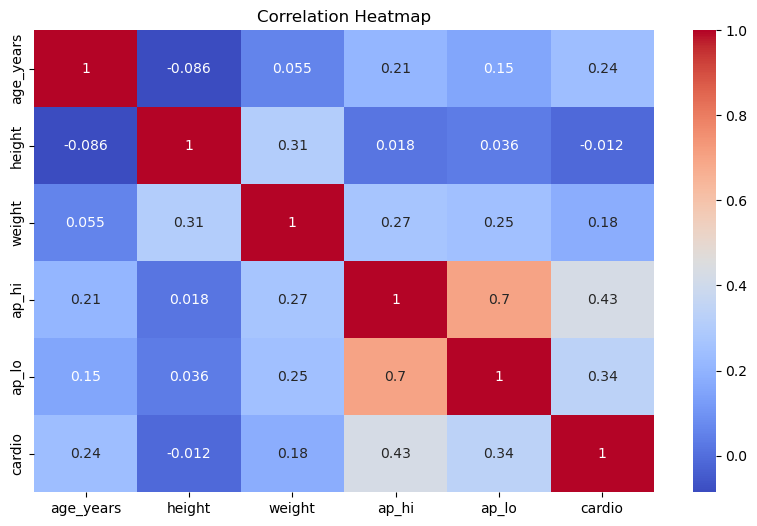

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols + ["cardio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()




# Scaling (Simple MinMaxScaler)

In [13]:
scaler = MinMaxScaler()
df_scaled = df_clean.copy()

df_scaled[num_cols] = scaler.fit_transform(df_clean[num_cols])

df_scaled.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,0.551724,0.188235,0.1875,0.266667,1,1,0,0,1,0,0.600000
1,1,20228,1,0.413793,0.323529,0.3750,0.333333,3,1,0,0,1,1,0.742857
2,2,18857,1,0.517241,0.200000,0.3125,0.200000,3,1,0,0,0,1,0.628571
3,3,17623,2,0.563218,0.305882,0.4375,0.400000,1,1,0,0,1,1,0.542857
4,4,17474,1,0.413793,0.152941,0.1250,0.133333,1,1,0,0,0,0,0.514286
